# Imports

In [17]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spellchecker import SpellChecker
from gensim.models import Word2Vec
import re
import nltk
import contractions
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Bidirectional
import numpy as np
import spacy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import seaborn as sns

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joaocosta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Reading the file and converting it to a DataFrame
def read_file_to_dataframe(filename):
    data = []
    
    with open("./data/" + filename, 'r', encoding='utf-8') as file:
        for linha in file:
            linha = linha.strip()  # Remove leading/trailing spaces and newlines
            filme = linha.split('\t')  # Split by tab
            data.append(filme)  # Append the row to the data list
    
    # Convert the list of rows to a pandas DataFrame
    df = pd.DataFrame(data)
    
    return df


# Variaveis onde está os ficheiros de treino e o modelo

In [19]:
#file onde já está o modelo treinado"
model=None
newPKL = "joao3"


#limpesa de ficheiro de treino
data="train"
#ficheiro onde vai ser feita ao autoavaliacao
avaliation = "test_no_labels"

In [20]:
print("\033[34mData to DataFrame\n\033[0m")
# Example usage
df = read_file_to_dataframe(data+".txt")
print(df)

Data to DataFrame

                              0          1        2                        3  \
0                  Ela Cheppanu     Telugu  romance                   Ramana   
1     A Nightmare on Elm Street   American   horror             Samuel Bayer   
2               American Gothic   American   horror               John Hough   
3                          Gang  Bollywood    crime              Mazhar Khan   
4            Intimate Relations    British    drama            Charles Frank   
...                         ...        ...      ...                      ...   
8036              Sa 'Yo Lamang   Filipino    drama          Laurice Guillen   
8037          The Lemon Sisters   American    drama             Joyce Chopra   
8038      Dil Ne Phir Yaad Kiya  Bollywood  romance                  Unknown   
8039  Rehnaa Hai Terre Dil Mein  Bollywood  romance            Gautham Menon   
8040             Things to Come    British   sci-fi  William Cameron Menzies   

                    

8041
Average word count: 370.33


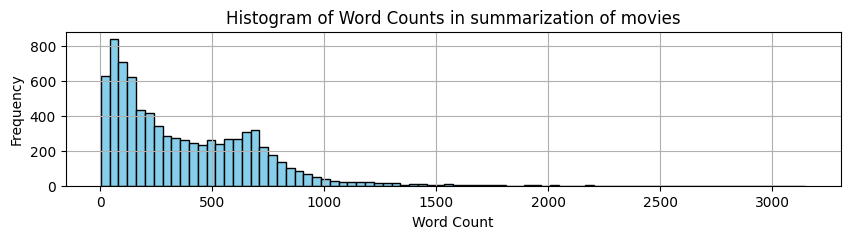

In [21]:
# histogram of word count
print(len(df))

df['word_count'] = df[4].apply(lambda x: len(x.split()))
avg_word_count = df['word_count'].mean()
print(f'Average word count: {avg_word_count:.2f}')
# Plotting the histogram of word counts
plt.figure(figsize=(10, 2))
plt.hist(df['word_count'], bins=80, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in summarization of movies')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


the: 161014
to: 111607
and: 106034
a: 80092
of: 53504
is: 49072
his: 43843
in: 43811
he: 30869
that: 30744


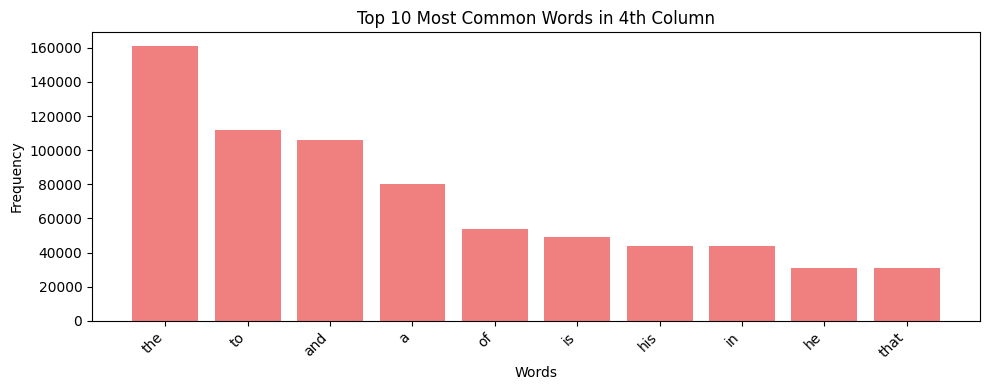

In [22]:
# Flatten all words from the 4th column into a single list
all_words = [word for row in df[4] for word in row.split()]

word_counter = Counter(all_words)

top_10_words = word_counter.most_common(10)

for word, count in top_10_words:
    print(f"{word}: {count}")

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 4))
plt.bar(words, counts, color='lightcoral')
plt.title('Top 10 Most Common Words in 4th Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate word labels for better readability
plt.tight_layout()
plt.show()

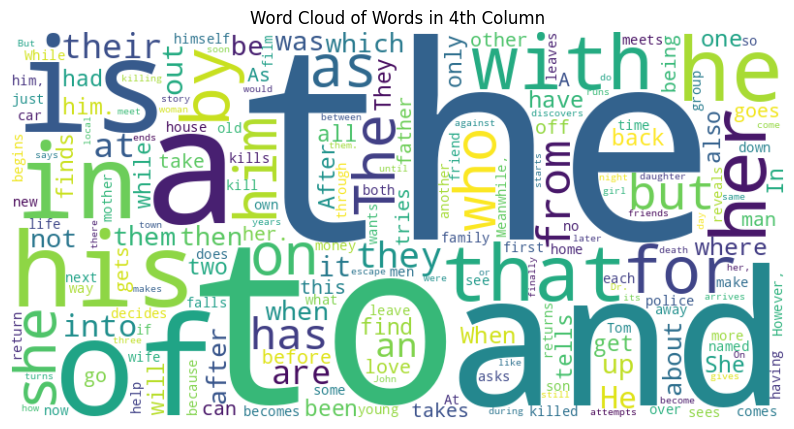

In [23]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Words in 4th Column')
plt.show()

In [24]:
# Check for typos using the pyspellchecker
spell = SpellChecker()
misspelled_words = spell.unknown(all_words)  # Identify misspelled words

# Display the number of potential typos
print(f"Number of potential typos: {len(misspelled_words)}")

# Optionally, print the misspelled words
print("\nPotential typos detected:")
for word in misspelled_words:
    print(word)

Number of potential typos: 110045

Potential typos detected:
chakka
wise)
cassie
disbelief,
prospector,
condom.
tobias'
ex-fiancé
divots.as
thames,
poles,
impulsively,
props,
tough.
sridharan
nao
1954,
benites),
tahil),
(chitti
jeeva(lal)
valestra.
darla,
win,
totaled,
jessie,
madhavi)
us-led
us$400,000
canadians
(desmond
aisha
nemo
violence.[2]
hand—he
ying-ying
witches.
cobham
feldon
hinduism,
allistair
popular.
jagganath
won!
derby.
(ah,
philosophies.
big.
nominees,
send.
(accidentally)
left,
keerthi)
nickname,
batz—an
tucci
alvarez
mimasaka
val,
circuit,
janakirama
disorder.this
payments,
repayment.
warfare.
ankara,
smashed,
fog,
kaimal
unnoticed,
betrothed,
breathe,
special-ed
irena
1980s-themed
ex-boyfriend
nyland.
secluded.
perera
lords,
stature,
relateable
human-like
inter-racially
hymen.
hai.
removed,
harman,
gordo's
jukebox,
(rajoo
mantajano
howard’s
(verno)
satipur,
kazuko.
lavender)
prowl.
janavi
vasher.
shingo
lochmouth,
research,
executor,
(peggie
shubhankar
quitting,
her

## Pre Processamento

## Carregar o modelo ou Criar um novo
#### Conforme o nome dado a variavel 'newPKL'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
from wikipedia2vec import Wikipedia2Vec

# Use the Wikipedia2Vec load method instead of pickle
wiki2vec = Wikipedia2Vec.load("data/enwiki_20180420_win10_300d.pkl")

In [ ]:
# Parameters
MAX_SEQUENCE_LENGTH = 207  # Maximum length of the movie plot sequences
EMBEDDING_DIM = 300  # Dimension of Wikipedia2Vec embeddings
NUM_GENRES = 9  # Number of genres to predict

# Step 1: Split the data first before preprocessing
X = df.iloc[:, 4]  # Movie plots
y = df.iloc[:, 2]  # Genres (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Encode the genres
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert to numerical labels
y_test_encoded = label_encoder.transform(y_test)  # Convert to numerical labels for test data

# Step 3: Preprocess training data (Tokenization and padding)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Fit tokenizer only on training data
word_index = tokenizer.word_index  # Dictionary mapping words to their token ids

# Convert movie plots to padded sequences for both train and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Step 4: Convert genres to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train_encoded, num_classes=NUM_GENRES)
y_test_cat = to_categorical(y_test_encoded, num_classes=NUM_GENRES)

# Step 5: Create the embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = wiki2vec.get_word_vector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except KeyError:
        # Word not in Wikipedia2Vec model
        pass

# Step 6: Build the LSTM model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))  # Pretrained embeddings, not trainable
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(NUM_GENRES, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Step 9: Predict genres for the test data
y_pred = model.predict(X_test_pad)

# Convert predictions and true values from one-hot to label encoding
y_test_labels = np.argmax(y_test_cat, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Step 6: Build the LSTM model

modelbi = Sequential()
modelbi.add(Embedding(len(word_index) + 1,
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))  # Pretrained embeddings, not trainable
modelbi.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
modelbi.add(Dense(64, activation='relu'))
modelbi.add(Dense(NUM_GENRES, activation='softmax'))  # Softmax for multi-class classification

# Compile the modelbi
modelbi.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Step 7: Train the modelbi
historybi = modelbi.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the modelbi on test data
test_lossbi, test_accuracybi = modelbi.evaluate(X_test_pad, y_test_cat)
print(f"Test Loss: {test_lossbi}")
print(f"Test Accuracy: {test_accuracybi}")

# Step 9: Predict genres for the test data
y_predbi = modelbi.predict(X_test_pad)

# Convert predictions and true values from one-hot to label encoding
y_test_labelsbi = np.argmax(y_test_cat, axis=1)
y_pred_labelsbi = np.argmax(y_predbi, axis=1)

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labelsbi, y_pred_labelsbi)
print("Confusion Matrix:")
print(conf_matrix)